In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Cell 2: Load Dataset
# Ensure 'Fake.csv' and 'True.csv' are in the same folder as this notebook
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake["label"] = 0  # Fake News
true["label"] = 1  # Real News

# Combine and shuffle
data = pd.concat([fake, true])
data = data.sample(frac=1).reset_index(drop=True)


In [3]:
# Cell 3: Prepare Text and Labels
data["content"] = data["title"] + " " + data["text"]
X = data["content"]
y = data["label"]


In [4]:
# Cell 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Cell 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [6]:
# Cell 6: Train Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4680
           1       0.99      0.99      0.99      4300

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Accuracy: 0.9868596881959911


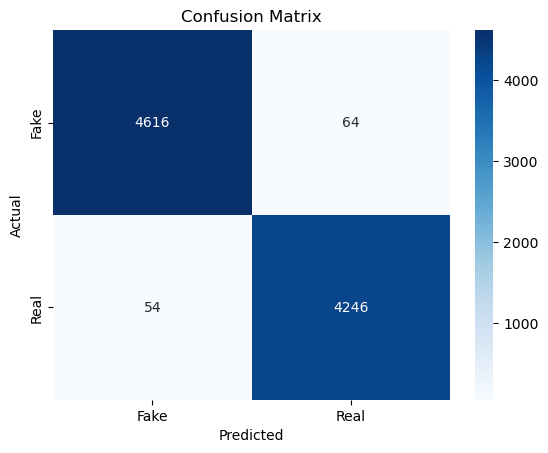

In [7]:
# Cell 7: Evaluate Model
y_pred = model.predict(X_test_vec)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [8]:
# Cell 8: Save Model and Vectorizer
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


In [9]:
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))
